## Sympy calculations for Exercise Sheet 4

We begin by loading Sympy and define a few symbols.

In [1]:
from sympy import *
init_printing()
x, y, a, b, t = symbols(r'x y a b t')
phi = Function(r'\phi')(t)

We also import matplotlib and define a wrapper around streamplot to visualize the vector fields we define symbolically in Sympy.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def streamplot_vectorfield(f, xmin=-2, xmax=2, ymin=-2, ymax=2):
    F = lambdify((x,y), f)
    Y, X = np.mgrid[ymin:ymax:200j, xmin:xmax:200j]
    U, V = F(X, Y)
    U = U[0,:,:]
    V = V[0,:,:]
    fig, ax = plt.subplots()
    speed = np.sqrt(U*U + V*V)
    lw = 3*np.log(1+speed) / np.log(1+speed.max())
    print(lw.shape, X.shape)
    ax.streamplot(X, Y, U, V, density=1.5, color='k', linewidth=lw)
    ax.set_aspect('equal', 'box')

### Problem 1(a)
Define the vector field corresponding to the system
$$
  \dot x = y \, (1+x-y^2) 
$$
$$
  \dot y = x \, (1+y-x^2)
$$
Then solve for the zeros of the right hand side.  We request the output in dictionary form, so that we can use it for substitutions later.

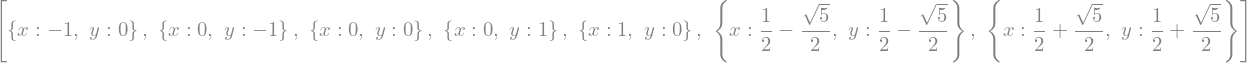

In [3]:
f = Matrix([y * (1+x-y**2),
            x * (1+y-x**2)])

eqp = solve(f,(x,y),dict=True)
eqp

Now compute the Jacobian:

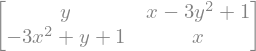

In [4]:
Df = f.jacobian((x,y))
Df

Now we can iterate through the equilibrium points and output the eigensystem.  The tuple that is output at each step is the eigenvalue, its algebraic multiplicity, and a basis for the corresponding eigenspace.

At equilibrium point {x: -1, y: 0} the eigenvalues and eigenvectors are as follows:


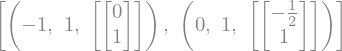

At equilibrium point {x: 0, y: -1} the eigenvalues and eigenvectors are as follows:


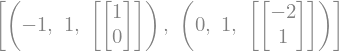

At equilibrium point {x: 0, y: 0} the eigenvalues and eigenvectors are as follows:


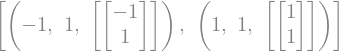

At equilibrium point {x: 0, y: 1} the eigenvalues and eigenvectors are as follows:


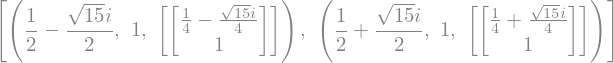

At equilibrium point {x: 1, y: 0} the eigenvalues and eigenvectors are as follows:


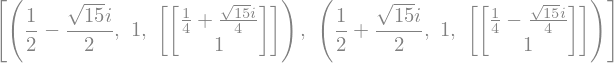

At equilibrium point {x: 1/2 - sqrt(5)/2, y: 1/2 - sqrt(5)/2} the eigenvalues and eigenvectors are as follows:


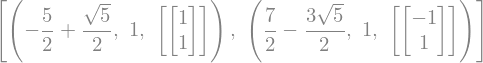

At equilibrium point {x: 1/2 + sqrt(5)/2, y: 1/2 + sqrt(5)/2} the eigenvalues and eigenvectors are as follows:


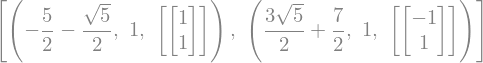

In [5]:
for z in eqp:
    print ("At equilibrium point", z, "the eigenvalues and eigenvectors are as follows:")
    display(Df.subs(z).eigenvects())

This is already everything for the linear analysis.  However, we see that equilibrium points 0 and 1 have a neutral eigenspace. So we might want to investigate the behavior of higher order terms to analyze the nonlinear dynamics along the neutral direction.  We work on equilibrium point 1 and separate out the stable direction `vs` and the neutral direction `vn`.  Here, we seek the evolution of an approximate solution of the form
$$
  \boldsymbol{x}(t) = x^* + \phi(t) \, \boldsymbol{v}_{\text{n}} + a \, \phi^2(t) \, \boldsymbol{v}_{\text{s}}
$$
where $\phi(t)$ parametrizes the displacement in the neutral direction, and the deviation from the neutral direction needs to be higher order.  In this ansatz, we take a single next-order term with a constant $a$ to be determined by consistency.  We will see that a second-order term suffices.  This is not always the case, as we shall see in Exercise 1(c).

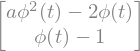

In [6]:
z = eqp[1]
vs = Df.subs(z).eigenvects()[0][2][0]
vn = Df.subs(z).eigenvects()[1][2][0]

X = Matrix([x,y]).subs(z) + phi*vn + a * phi**2 * vs
X

We now substitute this ansatz into the left hand side and the right hand side of the original differential equation. Our goal is to get an equation of the form 
$$ 
  \dot \phi(t) = g(\phi(t))
$$ 
to some order in $\phi(t)$.  On the left hand side we divide out $\phi'(t)$ so that we isolate the coefficient.  Since the vector field is two-dimensional, we get two equations for $\phi'(t)$ whose right hand side is given by `rhs[0]/lhs[0]` and `rhs[1]/lhs[1]`, respectively.  Since we are interested in small deviations about the equilibrium point, $\phi(t) \ll 1$ so that we can expand in a Taylor series about $\phi(t)=0$.  

Note that in Sympy we cannot use a function as an expansion variable, so we first subsitute a normal variable for it, expand, remove the order terms, and substitute $\phi(t)$ back into place.

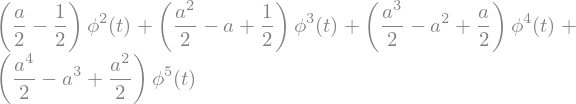

In [7]:
lhs = simplify(diff(X,t)/diff(phi,t))
rhs = f.subs(x,X[0]).subs(y,X[1])
series((rhs[0]/lhs[0]).subs(phi,t),t).removeO().subs(t,phi)

Now the same for the second component equation:

In [8]:
series((rhs[1]/lhs[1]).subs(phi,t),t).removeO().subs(t,phi)

We first note that both equations start at second order.  This is consistent with the fact that we are studying the dynamics in the neutral direction ("on the center manifold"), which should be asyptotically slower than any linear dynamics.

Second, we observe that the two equations can be made consistent at second order if 
$$
  -2 = \frac{a}2 = \frac12
$$
or $a=5$.  Then the second-order dynamics is well-defined and reads
$$
  \dot \phi(t) = -2 \, \phi^2(t)
$$
so the equilibrium point is unstable.

Finally, we visualize the vector field using our pre-defined wrapper function:

(200, 200) (200, 200)


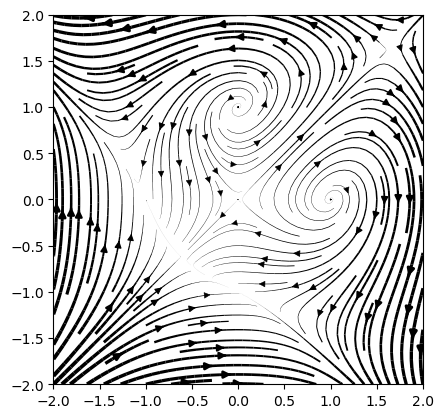

In [9]:
streamplot_vectorfield(f)

We can also zoom in near the linearly neutral point at $(-1,0)$:

(200, 200) (200, 200)


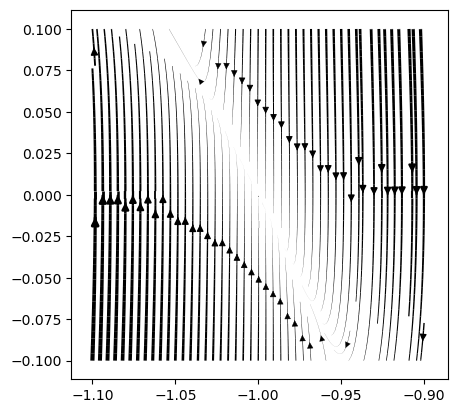

In [10]:
streamplot_vectorfield(f,-1.1,-0.9,-0.1,0.1)

### Problem 1(b)

In [11]:
f = Matrix([2*x - x**2 - x*y,
            -y + x*y])

eqp = solve(f,(x,y),dict=True)
eqp

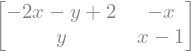

In [12]:
Df = f.jacobian((x,y))
Df

At equilibrium point {x: 0, y: 0} the eigenvalues and eigenvectors are as follows:


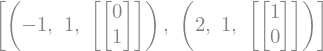

At equilibrium point {x: 1, y: 1} the eigenvalues and eigenvectors are as follows:


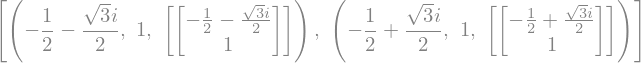

At equilibrium point {x: 2, y: 0} the eigenvalues and eigenvectors are as follows:


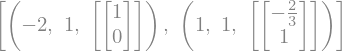

In [13]:
for z in eqp:
    print ("At equilibrium point", z, "the eigenvalues and eigenvectors are as follows:")
    display(Df.subs(z).eigenvects())

(200, 200) (200, 200)


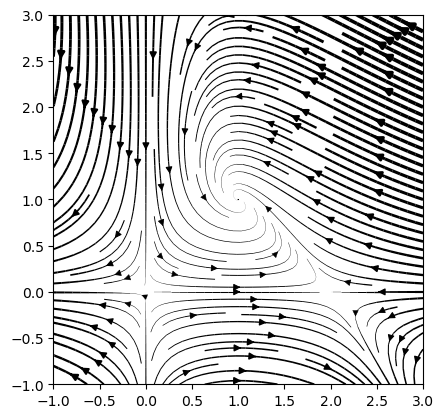

In [14]:
streamplot_vectorfield(f, -1, 3, -1, 3)

### Problem 1(c)

In [15]:
f = Matrix([y,
            -y-x**3])

eqp = solve(f,(x,y),dict=True)
eqp

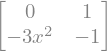

In [16]:
Df = f.jacobian((x,y))
Df

At equilibrium point {x: 0, y: 0} the eigenvalues and eigenvectors are as follows:


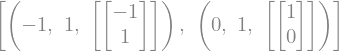

In [17]:
for z in eqp:
    print ("At equilibrium point", z, "the eigenvalues and eigenvectors are as follows:")
    display(Df.subs(z).eigenvects())

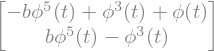

In [18]:
z = eqp[0]
vs = Df.subs(z).eigenvects()[0][2][0]
vn = Df.subs(z).eigenvects()[1][2][0]

X = Matrix([x,y]).subs(z) + phi*vn - phi**3 * vs + b * phi**5 * vs
X 

In [19]:
lhs = simplify(diff(X,t)/diff(phi,t))
rhs = f.subs(x,X[0]).subs(y,X[1])
series((rhs[0]/lhs[0]).subs(phi,t),t).removeO().subs(t,phi)

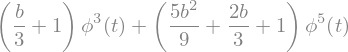

In [20]:
series((rhs[1]/lhs[1]).subs(phi,t),t).removeO().subs(t,phi)

(200, 200) (200, 200)


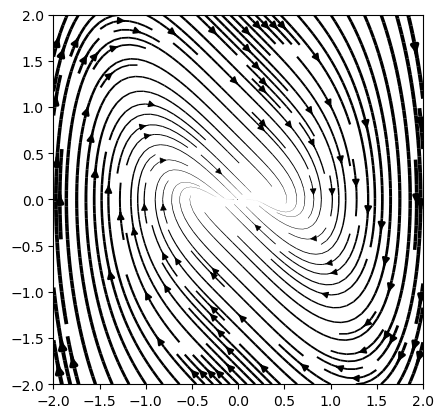

In [21]:
streamplot_vectorfield(f)

### Problem 2

In [22]:
mu = symbols(r'\mu')
f = Matrix([y - x**3 + mu*x,
            -x])

eqp = solve(f,(x,y),dict=True)
eqp

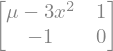

In [23]:
Df = f.jacobian((x,y))
Df

At equilibrium point {x: 0, y: 0} the eigenvalues and eigenvectors are as follows:


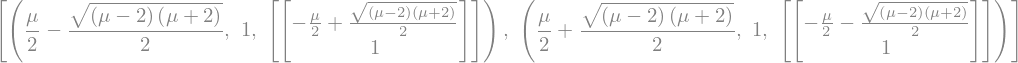

In [24]:
for z in eqp:
    print ("At equilibrium point", z, "the eigenvalues and eigenvectors are as follows:")
    display(Df.subs(z).eigenvects())

(200, 200) (200, 200)


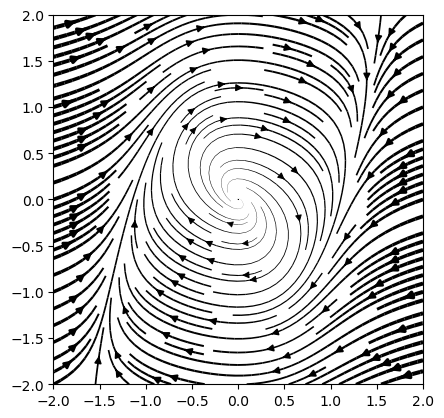

In [27]:
streamplot_vectorfield(f.subs(mu,1))